<a href="https://colab.research.google.com/github/Thiruppaavai-TM/ML-and-data-science/blob/main/Life_Expectancy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
df1=pd.read_csv('/content/Life Expectancy Data.csv')
df=df.drop('Country',axis=1)
df.head()

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0     0.01               71.279624         65.0      1154   19.1  ...    6.0   
1     0.01               73.523582         62.0       492   18.6  ...   58.0   
2     0.01               73.219243         64.0       430   18.1  ...   62.0   
3     0.01               78.184215         67.0      2787   17.6  ...   67.0   
4     0.01                7.097109         68.0      3013   17.2  ...   68.0   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 21 columns]

In [ ]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

## **EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

<Axes: >

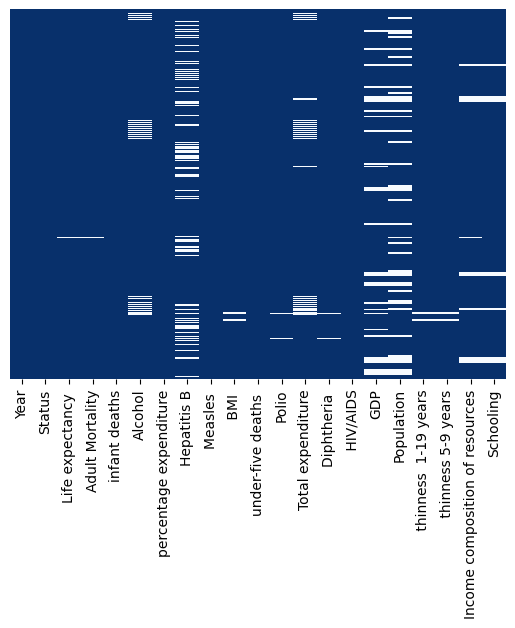

In [ ]:
sns.heatmap(df.notnull(),yticklabels=False,cbar=False,cmap='Blues')

<Axes: >

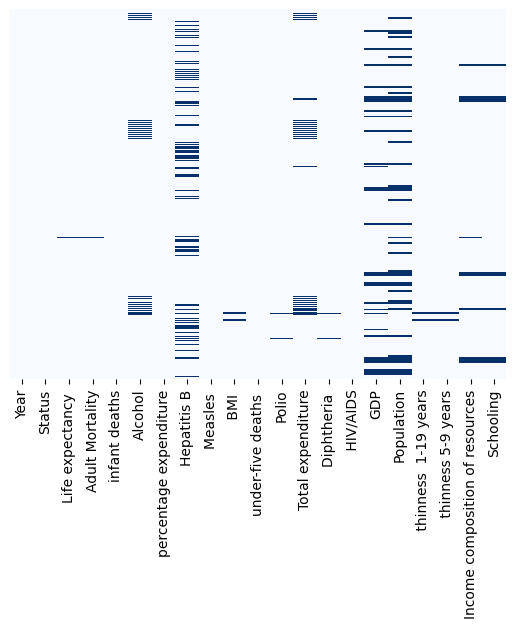

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

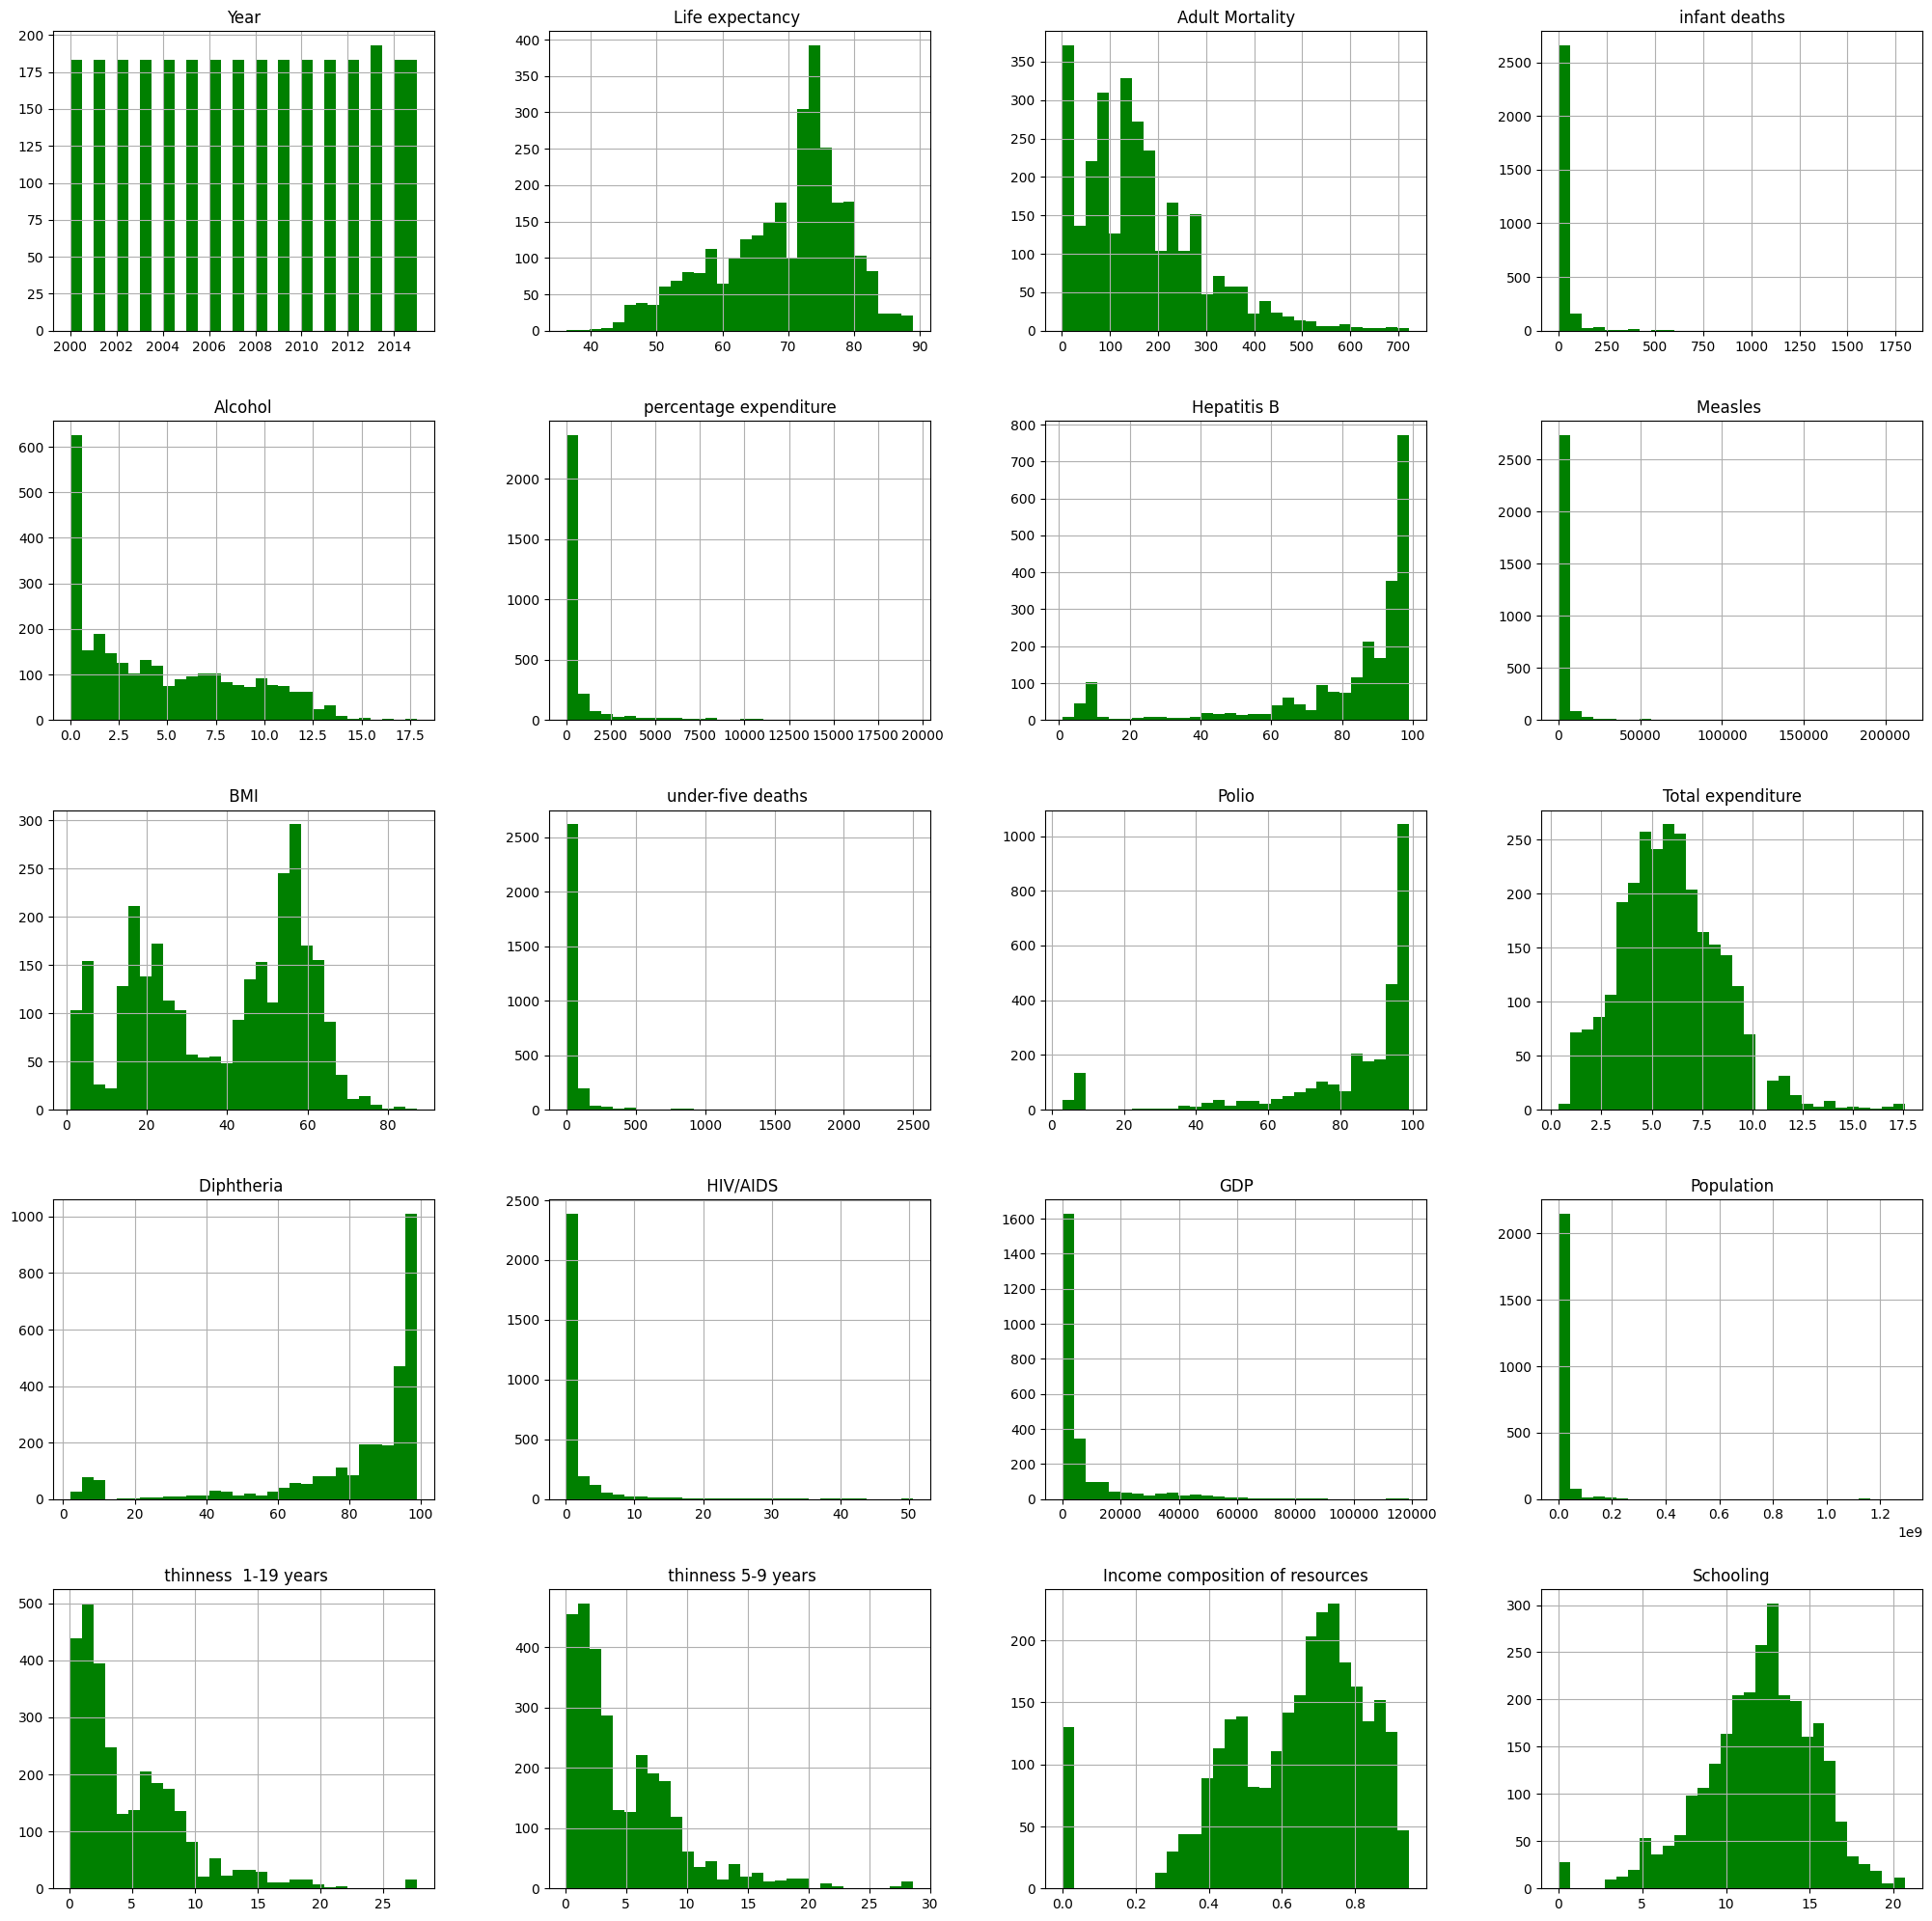

In [ ]:
df.hist(bins=30,figsize=(25,25),color='g');

<Figure size 2000x2000 with 0 Axes>

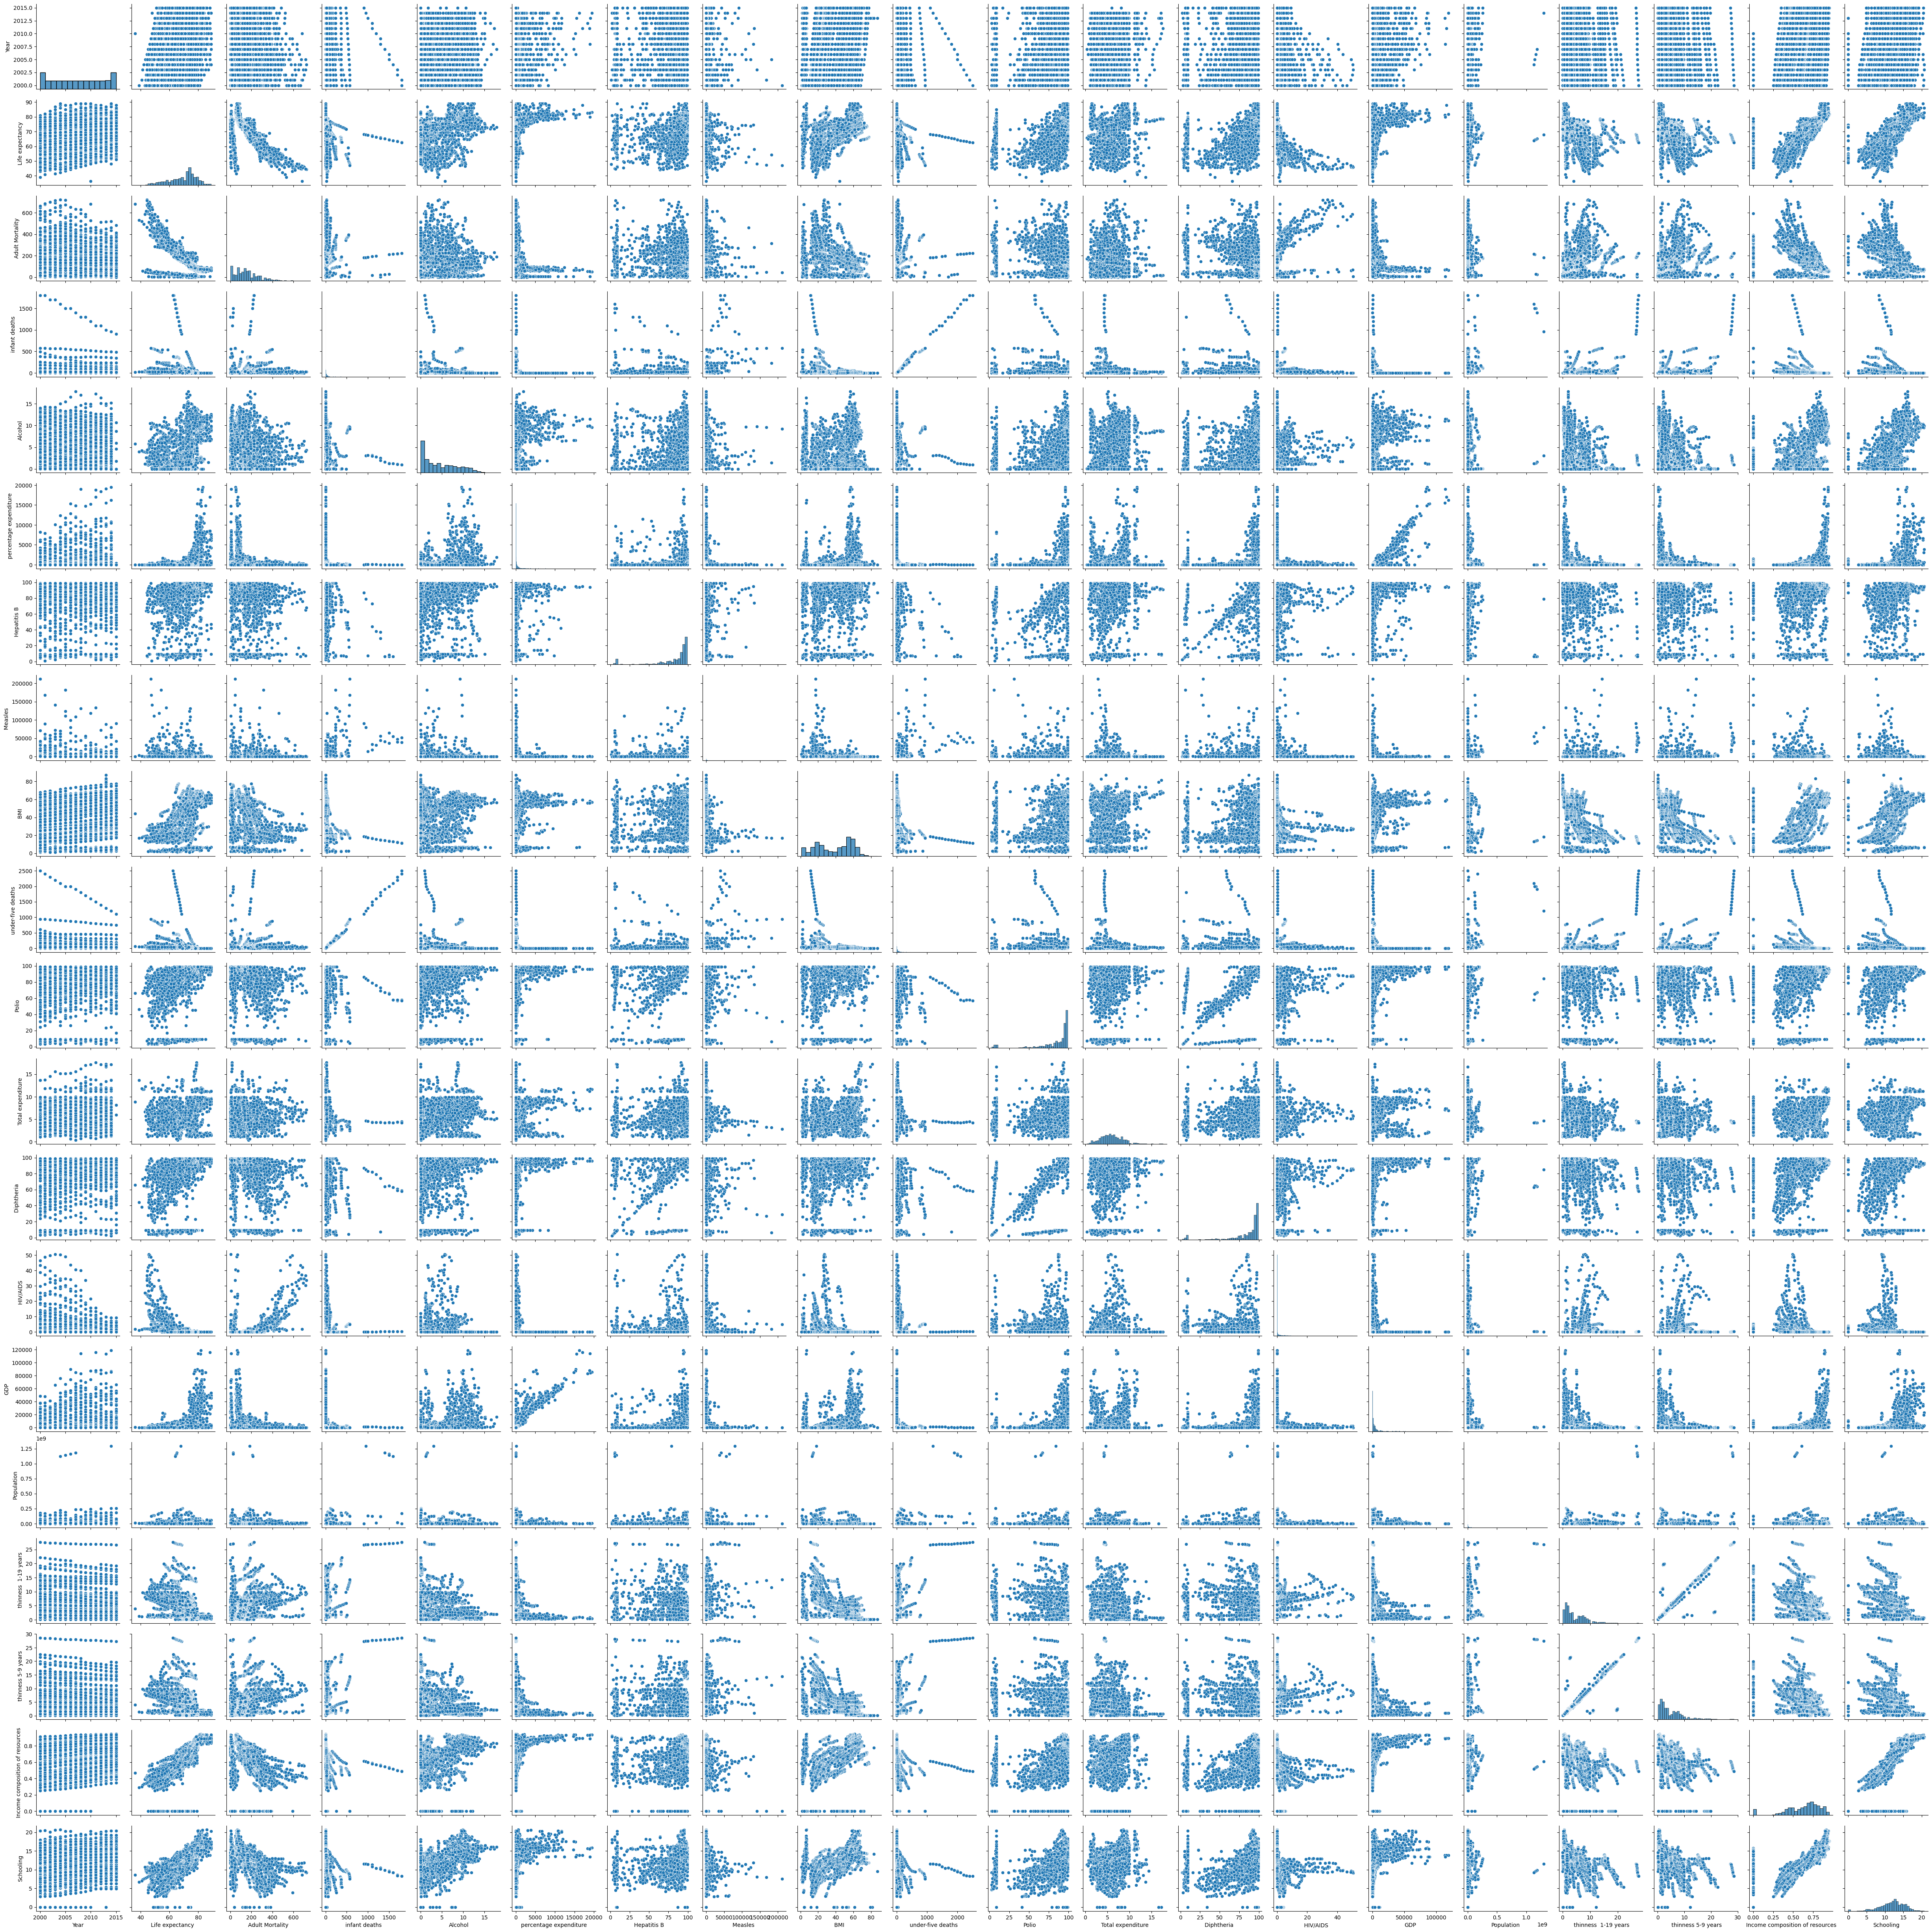

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

<Axes: xlabel='Schooling', ylabel='Life expectancy '>

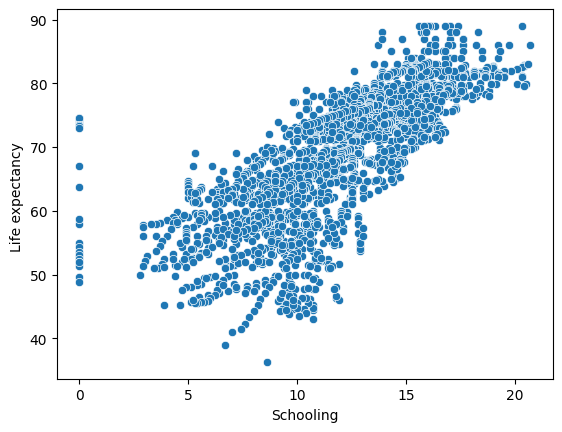

In [ ]:
sns.scatterplot(data =df, x = 'Schooling', y = 'Life expectancy ')

<Axes: xlabel='Income composition of resources', ylabel='Life expectancy '>

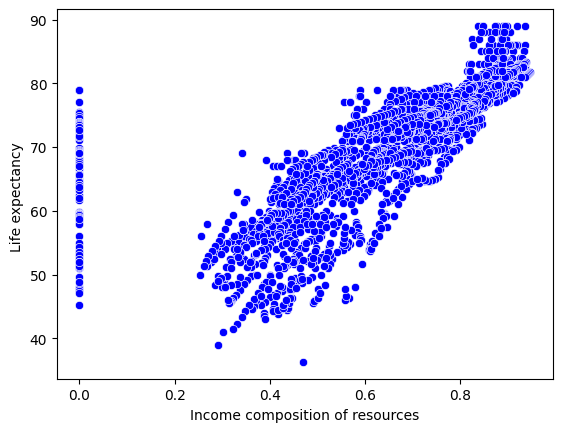

In [ ]:
sns.scatterplot(data = df, x = 'Income composition of resources', y = 'Life expectancy ',color='b')

<Axes: xlabel='GDP', ylabel='Life expectancy '>

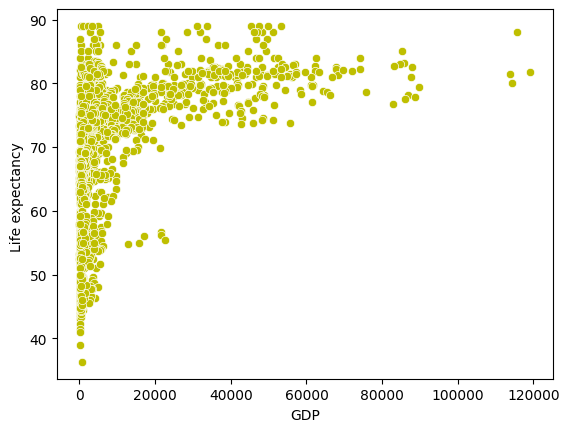

In [ ]:
sns.scatterplot(data = df, x = 'GDP', y = 'Life expectancy ',color='y')

<Axes: xlabel=' HIV/AIDS', ylabel='Life expectancy '>

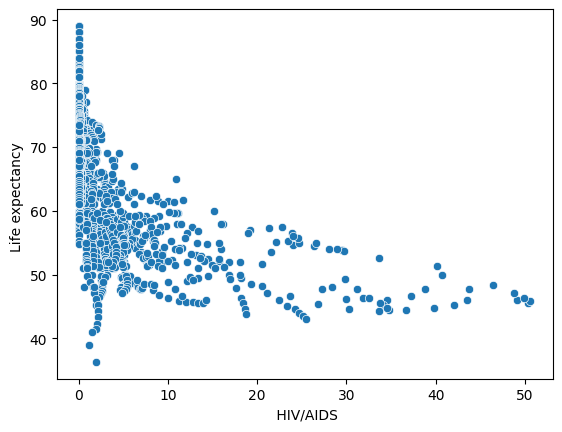

In [ ]:
sns.scatterplot(data = df, x = ' HIV/AIDS', y = 'Life expectancy ')

<ipython-input-56-e4a8689622c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


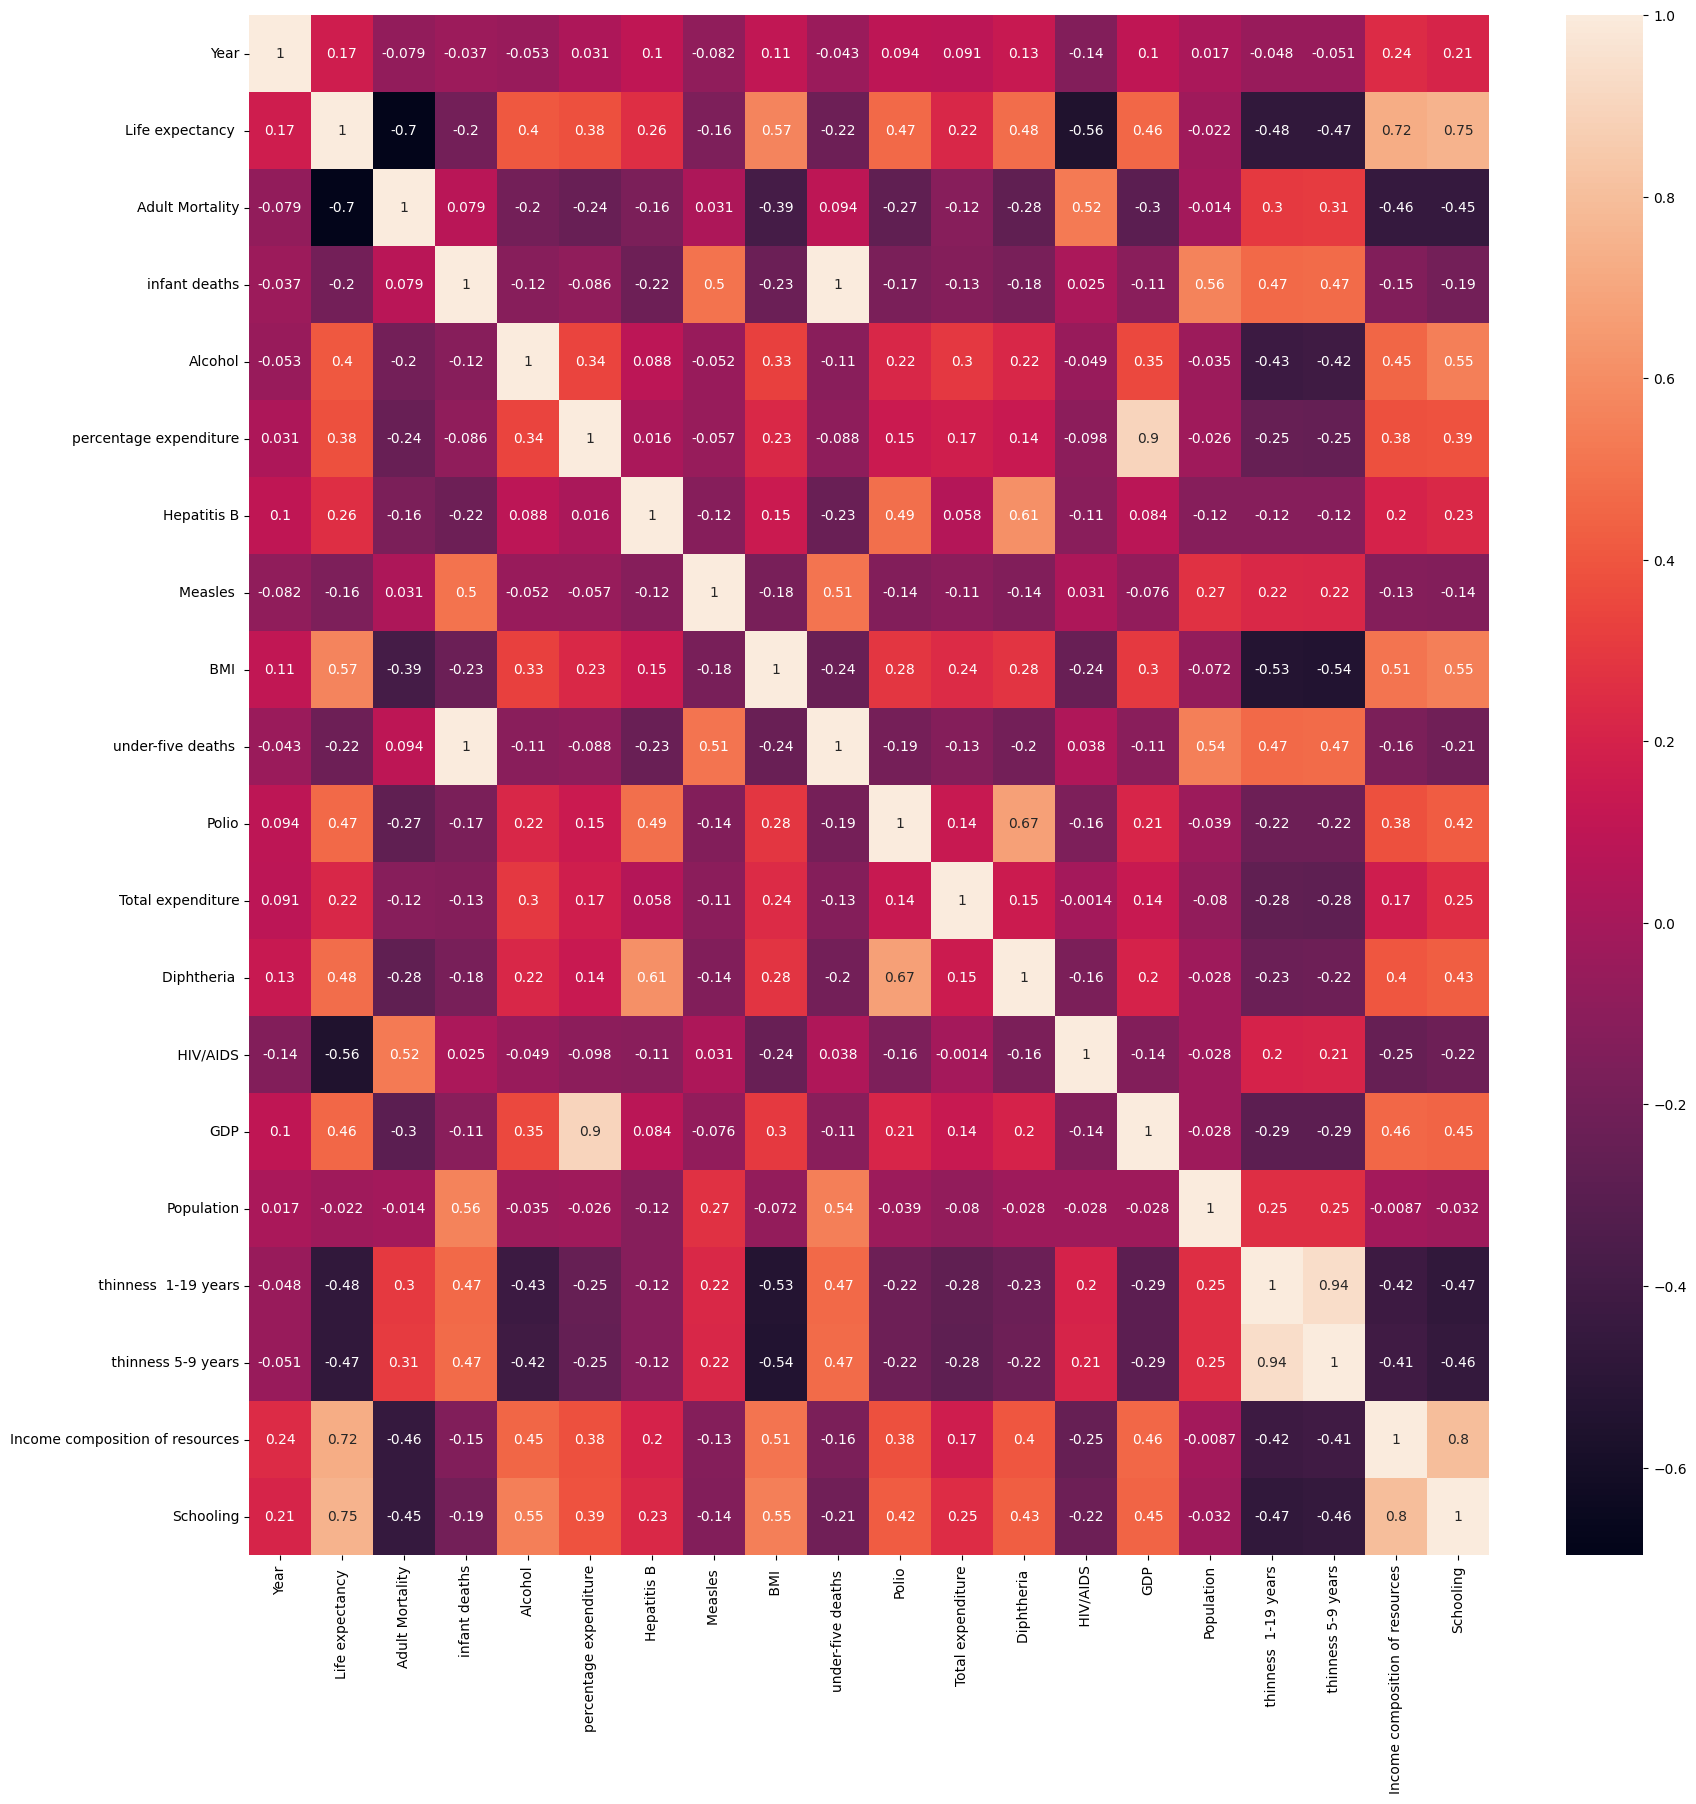

In [ ]:
plt.figure(figsize=(20,20))
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)
plt.show()

In [ ]:
df['Status'].nunique()


2

In [ ]:
df=pd.get_dummies(df,columns=['Status'])

In [ ]:
df.head()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0             62     0.01   
1  2014              59.9            271.0             64     0.01   
2  2013              59.9            268.0             66     0.01   
3  2012              59.5            272.0             69     0.01   
4  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   ...  Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0  ...         65.0        0.1  584.259210  33736494.0                   17.2   
1  ...         62.0        0.1  612.696514    327582.0                   17.5   
2  ...         64.0        0.1  631.744976  31731688.0                   17.7   
3  ...         67.0        0.1  669.959000   3696958.0                   17.9   
4  ...         68.0        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  \
0                 17.3                            0.479       10.1   
1                 17.5                            0.476       10.0   
2                 17.7                            0.470        9.9   
3                 18.0                            0.463        9.8   
4                 18.2                            0.454        9.5   

   Status_Developed  Status_Developing  
0                 0                  1  
1                 0                  1  
2                 0                  1  
3                 0                  1  
4                 0                  1  

[5 rows x 22 columns]

In [ ]:
df.isnull().sum()[np.where(df1.isnull().sum() != 0)[0]]

infant deaths                        0
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64

In [ ]:
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
df.isnull().sum()[np.where(df1.isnull().sum() != 0)[0]]

infant deaths                      0
Alcohol                            0
Hepatitis B                        0
 BMI                               0
Polio                              0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developed                   0
Status_Developing                  0
dtype: int64

# **PREDICTION**

In [ ]:
X = df.drop(columns = ['Life expectancy '])
y = df[['Life expectancy ']]


In [ ]:
X.head()

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015            263.0             62     0.01               71.279624   
1  2014            271.0             64     0.01               73.523582   
2  2013            268.0             66     0.01               73.219243   
3  2012            272.0             69     0.01               78.184215   
4  2011            275.0             71     0.01                7.097109   

   Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  Diphtheria   \
0         65.0      1154   19.1                  83    6.0  ...         65.0   
1         62.0       492   18.6                  86   58.0  ...         62.0   
2         64.0       430   18.1                  89   62.0  ...         64.0   
3         67.0      2787   17.6                  93   67.0  ...         67.0   
4         68.0      3013   17.2                  97   68.0  ...         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  \
0                 17.3                            0.479       10.1   
1                 17.5                            0.476       10.0   
2                 17.7                            0.470        9.9   
3                 18.0                            0.463        9.8   
4                 18.2                            0.454        9.5   

   Status_Developed  Status_Developing  
0                 0                  1  
1                 0                  1  
2                 0                  1  
3                 0                  1  
4                 0                  1  

[5 rows x 21 columns]

In [ ]:
y.head()

Life expectancy 
0              65.0
1              59.9
2              59.9
3              59.5
4              59.2

In [ ]:
X=np.array(X).astype('float32')
y=np.array(y).astype('float32')

In [ ]:
X

array([[2.015e+03, 2.630e+02, 6.200e+01, ..., 1.010e+01, 0.000e+00,
        1.000e+00],
       [2.014e+03, 2.710e+02, 6.400e+01, ..., 1.000e+01, 0.000e+00,
        1.000e+00],
       [2.013e+03, 2.680e+02, 6.600e+01, ..., 9.900e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.002e+03, 7.300e+01, 2.500e+01, ..., 1.000e+01, 0.000e+00,
        1.000e+00],
       [2.001e+03, 6.860e+02, 2.500e+01, ..., 9.800e+00, 0.000e+00,
        1.000e+00],
       [2.000e+03, 6.650e+02, 2.400e+01, ..., 9.800e+00, 0.000e+00,
        1.000e+00]], dtype=float32)

In [ ]:
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [ ]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.8343813444952827

In [ ]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[-0.00787362 -0.25538212  1.2313064   0.03065546  0.02024092 -0.03416915
  -0.02025247  0.09254283 -1.2565539   0.06569766  0.01473308  0.10461356
  -0.2524633   0.04872908  0.00400954 -0.02709499 -0.01390777  0.1209226
   0.2250724   0.02996271 -0.02996244]]
Linear Model Coefficient (b):  [-1.0121257e-08]


In [ ]:
y_predict = regresssion_model_sklearn.predict(X_test)

Text(0.5, 1.0, 'Results')

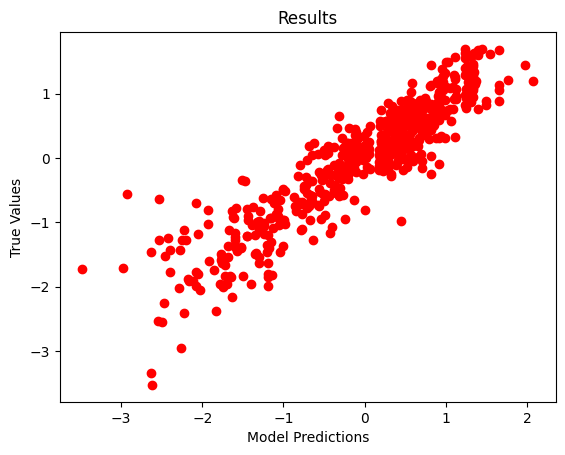

In [ ]:
plt.plot(y_test, y_predict, "o", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.title('Results')

In [ ]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0.5, 1.0, 'Original')

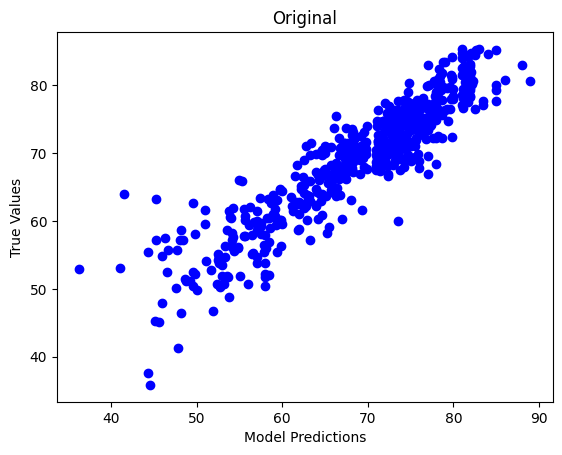

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "o", color = 'b')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.title('Original')